Importing the necessary files

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

Reading data as data frame

In [4]:
ins_df=pd.read_csv('insurance_ProjectDataSet.csv')

EDA - shape & type of Data

In [7]:
print("the shape of data is",ins_df.shape)
print("the type of data is \n",ins_df.dtypes)


the shape of data is (1338, 7)
the type of data is 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


EDA - Checking the presence of missing values

In [8]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

5 point summary of numerical attributes

In [9]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Text(0.5, 0, 'bmi')

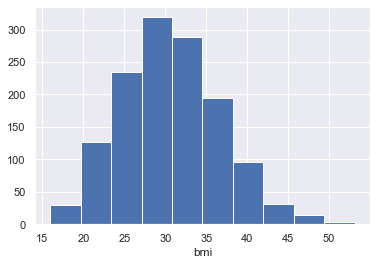

In [11]:
##Distribution of BMI
plt.hist(ins_df.bmi)
plt.xlabel('bmi')

#plt.hist(insurance_df.charges)

Text(0.5, 0, 'age')

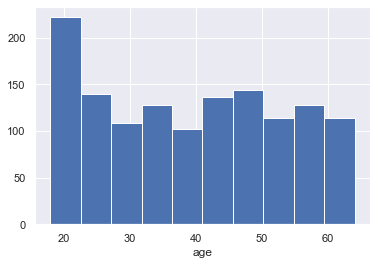

In [12]:
##Distribution of AGE
plt.hist(ins_df.age)
plt.xlabel('age')

Text(0.5, 0, 'Charges')

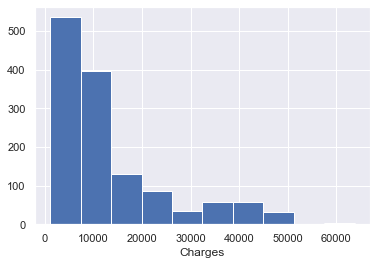

In [13]:
##Distribution of CHARGES
plt.hist(ins_df.charges)
plt.xlabel('Charges')

EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
1.The distribution of BMI is uniform.Hence no skewedness
2.Charges and age columns are skewed to left

In [14]:
df=pd.DataFrame({'skewness':[stats.skew(ins_df.bmi),stats.skew(ins_df.age),stats.skew(ins_df.charges)]},index=['bmi','age','charges'])
df

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


EDA - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [ ]:
#Charges columns has lots of outliers

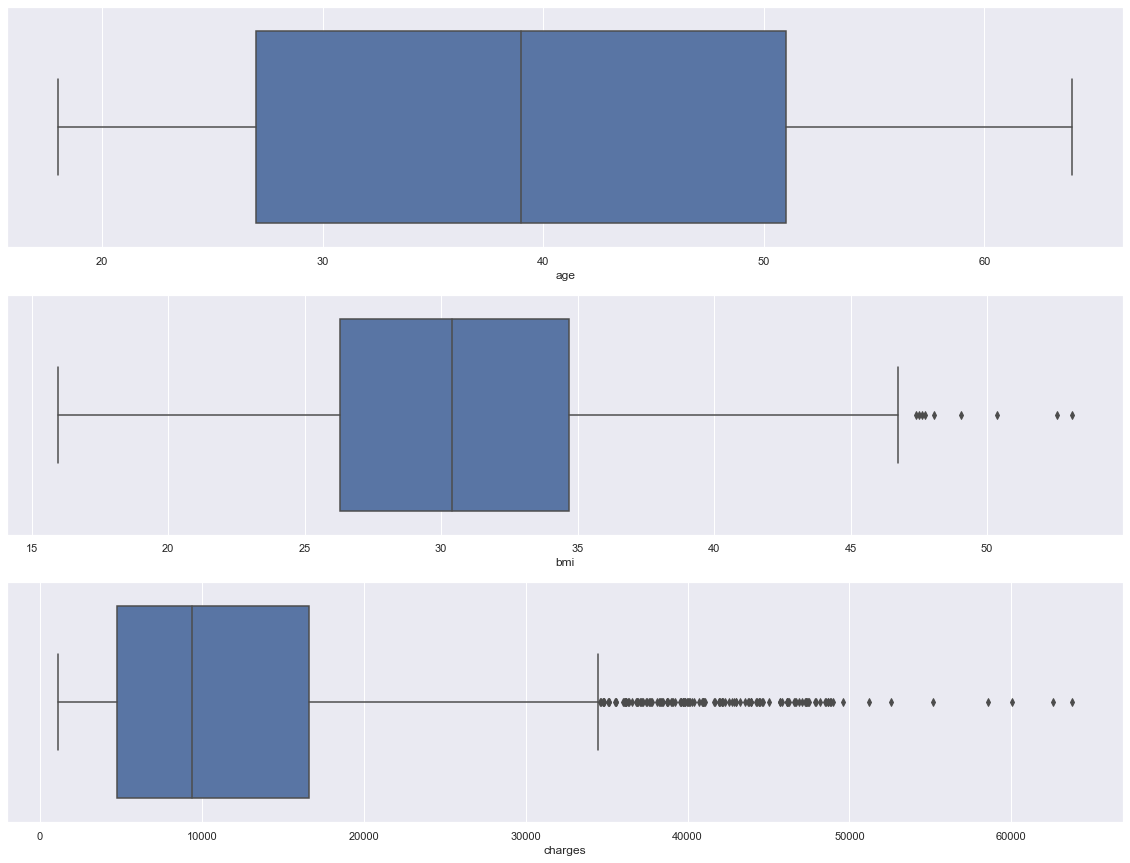

In [15]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=ins_df["age"])


plt.subplot(3,1,2)
sns.boxplot(x=ins_df["bmi"])


plt.subplot(3,1,3)
sns.boxplot(x=ins_df["charges"])

Distribution of categorical colums

In [16]:
ins_df.head()
print(ins_df['children'].value_counts().count())

6


In [17]:
#Seperating the categorical colums into new dataframe
ins_cat_df=ins_df.select_dtypes(include=['object']).copy()
ins_cat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


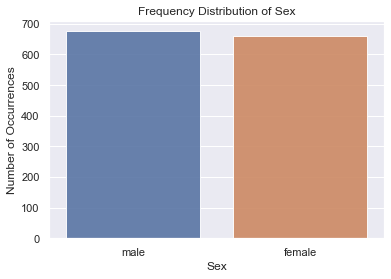

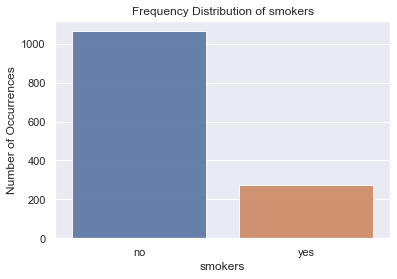

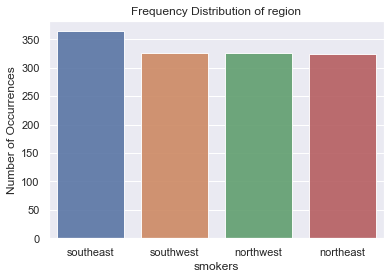

In [18]:
#plotting distribution of sex
sex_count = ins_cat_df['sex'].value_counts()
sns.barplot(sex_count.index, sex_count.values, alpha=0.9)
plt.title('Frequency Distribution of Sex')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show()

#plotting distribution of smokers
smokers_count = ins_cat_df['smoker'].value_counts()
sns.barplot(smokers_count.index, smokers_count.values, alpha=0.9)
plt.title('Frequency Distribution of smokers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('smokers', fontsize=12)
plt.show()


#plotting distribution of region
smokers_count = ins_cat_df['region'].value_counts()
sns.barplot(smokers_count.index, smokers_count.values, alpha=0.9)
plt.title('Frequency Distribution of region')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('smokers', fontsize=12)
plt.show()

EDA - Pair plot that includes all the columns of the data frame

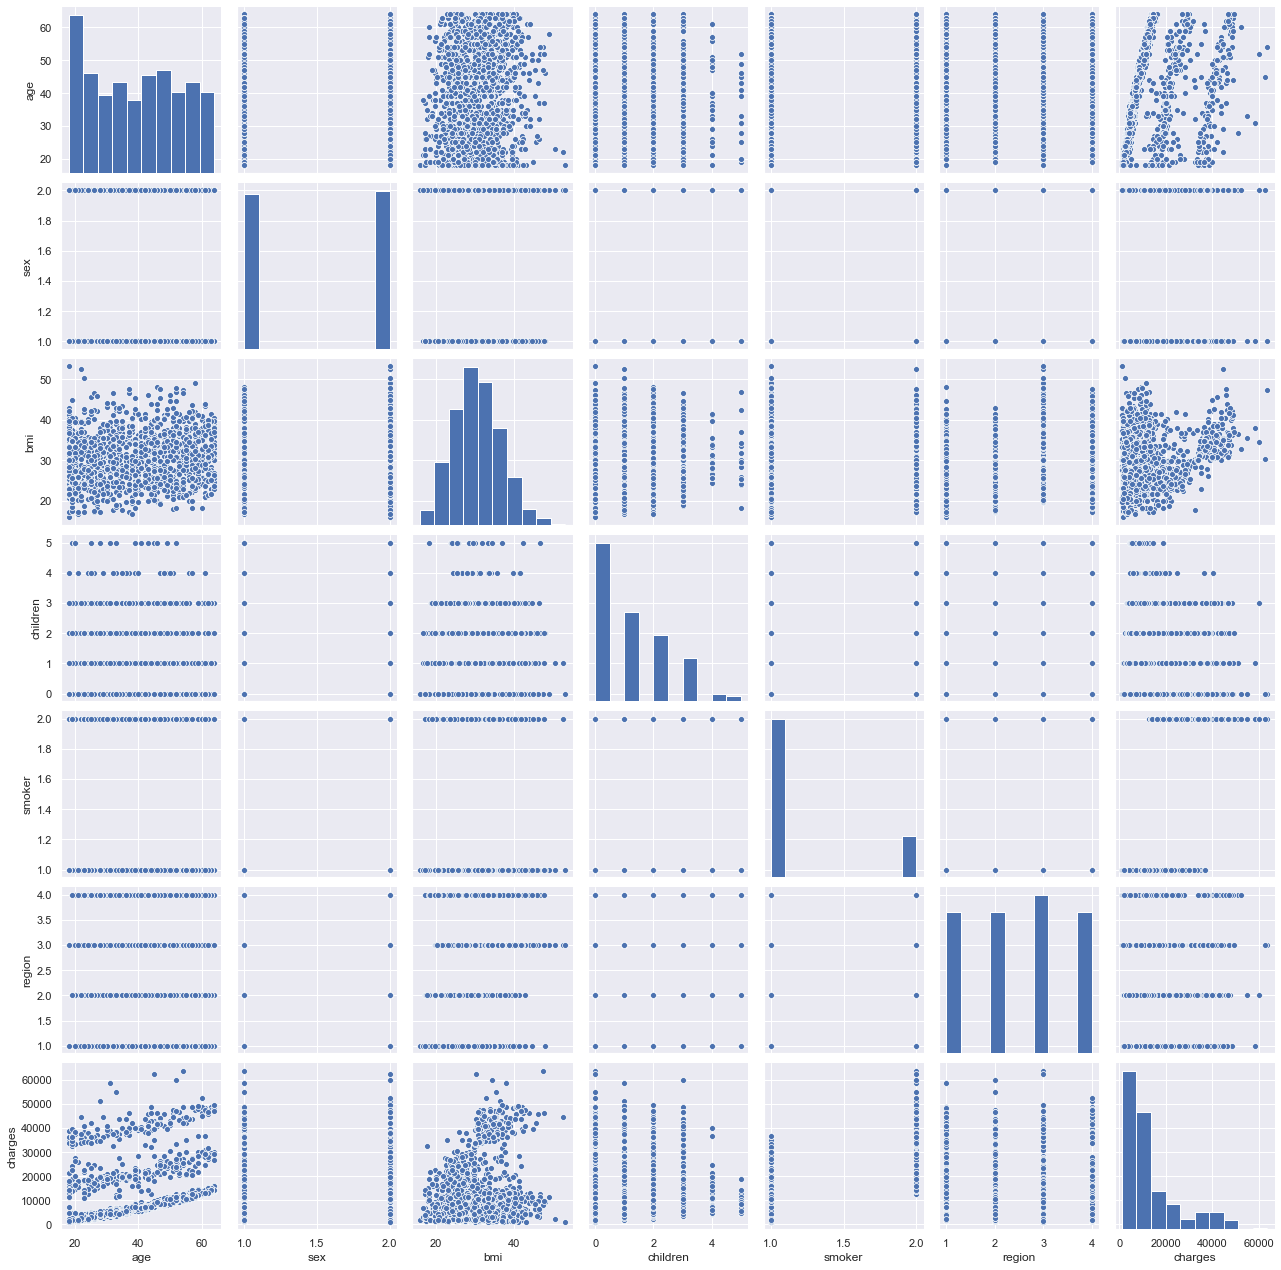

In [19]:
labels = ins_df['sex'].astype('category').cat.categories.tolist()
replace_map_sex = {'sex' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
labels_smoker = ins_df['smoker'].astype('category').cat.categories.tolist()
replace_map_smoker = {'smoker' : {k: v for k,v in zip(labels_smoker,list(range(1,len(labels_smoker)+1)))}}
labels_region = ins_df['region'].astype('category').cat.categories.tolist()
replace_map_region = {'region' : {k: v for k,v in zip(labels_region,list(range(1,len(labels_region)+1)))}}

ins_df_copy = ins_df.copy()
ins_df_copy.replace(replace_map_sex, inplace=True)
ins_df_copy.replace(replace_map_smoker,inplace=True)
ins_df_copy.replace(replace_map_region, inplace=True)

sns.pairplot(ins_df_copy)

Do charges of people who smoke differ significantly from the
people who don't?

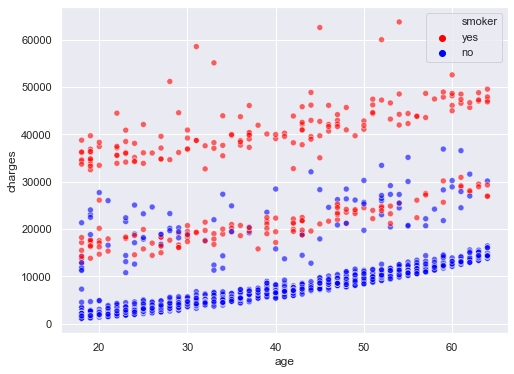

In [21]:
#visualisation of smokers
plt.figure(figsize=(8,6))
sns.scatterplot(ins_df.age, ins_df.charges,hue=ins_df.smoker,palette= ['red','blue'] ,alpha=0.6)
plt.show()

In [22]:
#T-test to verify if smoking influences the charges

In [111]:

Ho = "Smoking has no effect on Charges"   # Stating the Null Hypothesis
Ha = "Smoking has an effect on Charges"   # Stating the Alternate Hypothesis

x = np.array(ins_df[ins_df.smoker == 'yes'].charges)  # Selecting bmi values corresponding to males as an array
y = np.array(ins_df[ins_df.smoker == 'no'].charges) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Smoking has an effect on Charges as the p_value (0.0) < 0.05


Does bmi of males differ significantly from that of females? (7
marks)

In [23]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(ins_df[ins_df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(ins_df[ins_df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


Is the proportion of smokers significantly different in different
genders? (7 marks)


In [26]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(ins_df['sex'],ins_df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Is the distribution of bmi across women with no children, one child
and two children, the same?

In [27]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = (ins_df[ins_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
